In [21]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('GradesAllF.csv')
df.head()

,CrsPBAColl,CrsPBADiv,Subject,Course,Avg Enrl,Total Enrl,Avg Grade,Avg Hours,PCT A,PCT B,PCT C,PCT C MINUS OR BELOW,PCT DF,PCT DFW,Workload Raw,Avg Course,Avg Instructor,Avg N_Ret,Sections,Total N_Ret
0,AP,CrsPBADiv,ARCH,3114,134,2143,3.00,3.0,35%,39%,19%,11%,6%,8%,2.1,4.17,4.40,76.3,16,1221.0
1,AP,CrsPBADiv,ARCH,3214,107,1598,3.02,3.0,36%,41%,16%,10%,6%,8%,2.0,4.38,4.60,66.1,15,992.0
2,AP,CrsPBADiv,ARCH,4010,16,474,3.71,5.2,80%,19%,1%,1%,0%,0%,4.4,4.22,4.61,12.7,29,367.0
3,AP,CrsPBADiv,ENVD,1001,14,98,3.42,1.0,66%,19%,11%,10%,4%,15%,1.2,3.94,5.31,6.9,7,48.0
4,AP,CrsPBADiv,ENVD,1004,130,2469,2.98,4.3,38%,36%,18%,12%,8%,11%,2.8,4.72,4.99,65.4,19,1242.0


In [4]:
df.describe()

,Course,Avg Enrl,Total Enrl,Avg Grade,Avg Hours,Workload Raw,Avg Course,Avg Instructor,Avg N_Ret,Sections,Total N_Ret
count,4954.000000,4954.000000,4954.000000,4885.000000,4954.00000,4757.000000,4757.000000,4757.000000,4793.000000,4954.000000,4793.000000
mean,4126.063383,31.250706,482.350222,3.384141,2.91742,2.811541,4.879565,5.162951,22.403630,12.898466,338.559149
std,1733.212441,32.701825,1396.590721,0.373439,0.70472,0.762937,0.527823,0.501291,20.065375,42.451464,942.808326
min,1000.000000,10.000000,10.000000,2.000000,0.00000,1.000000,1.630000,2.000000,0.000000,1.000000,0.000000
25%,3030.000000,15.000000,39.000000,3.110000,3.00000,2.300000,4.580000,4.890000,11.500000,2.000000,30.000000
50%,4140.000000,20.000000,118.000000,3.400000,3.00000,2.700000,4.930000,5.240000,16.000000,5.000000,91.000000
75%,5181.000000,34.000000,363.000000,3.680000,3.00000,3.200000,5.240000,5.510000,26.000000,11.000000,276.000000
max,8990.000000,811.000000,32680.000000,4.000000,10.00000,6.000000,6.000000,6.000000,445.300000,1823.000000,26953.000000


In [20]:
df.CrsPBAColl.unique()

array(['AP', 'AS', 'BU', 'EB', 'EN', 'GR', 'JR', 'LW', 'MB', 'XX', 'CM',
       'EV'], dtype=object)

AP = ???

AS = Arts & Sciences

BU = Business (and management?)

EB = Education (and leadership?)

EN = Engineering

GR, JR = ???

LW = Law

MB = Music?

XX = ??

CM = Communications

In [65]:
AS = df.loc[df.CrsPBAColl.isin(['AS'])]

art_and_history = AS.loc[AS.CrsPBADiv.isin(['AH'])]
natural_sciences = AS.loc[AS.CrsPBADiv.isin(['NS'])]
social_sciences = AS.loc[AS.CrsPBADiv.isin(['SS'])]

engineering = df.loc[df.CrsPBAColl.isin(['EN'])]

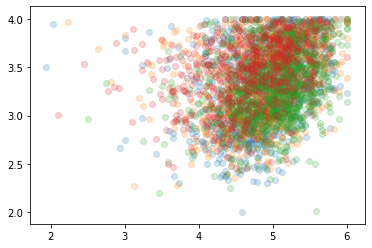

In [75]:
x = 'Avg Course'
y = 'Avg Grade'

plt.scatter(natural_sciences[x], natural_sciences[y], alpha=0.2)
plt.scatter(social_sciences[x], social_sciences[y], alpha=0.2)
plt.scatter(art_and_history[x], art_and_history[y], alpha=0.2)
plt.scatter(engineering[x], engineering[y], alpha=0.2)

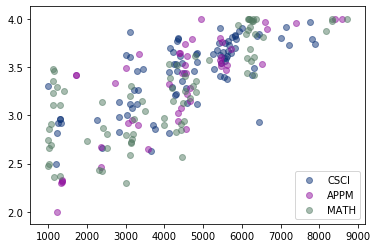

In [86]:
majors = ['CSCI','APPM','MATH']
for major in majors:
    maj_courses = df.loc[df.Subject.isin([major])]
    
    color = "%06x" % np.random.randint(0, 0xFFFFFF) # Generate random color
    color = '#'+color
    plt.scatter(maj_courses.Course.values, maj_courses['Avg Grade'].values, color=color, alpha=0.5)
plt.legend(majors,loc='lower right')

In [96]:
math_calc = df.loc[df.Subject.isin(['MATH']) & df.Course.isin([1300,2300,2400])]
appm_calc = df.loc[df.Subject.isin(['APPM']) & df.Course.isin([1340,1345,1350,1360,2350])]

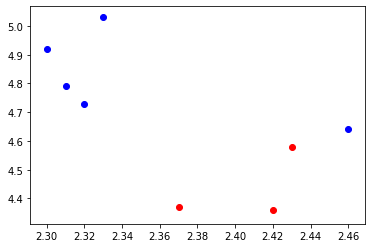

In [95]:
plt.scatter(math_calc['Avg Grade'].values, math_calc['Avg Course'], color = 'r')
plt.scatter(appm_calc['Avg Grade'].values, appm_calc['Avg Course'], color = 'b')